In [30]:
import torch 
from GMVAE import GMVAE
import dataloader as dl 
dev=torch.device("cuda")


In [31]:
gmvae = GMVAE()

In [32]:
gmvae.load_state_dict(torch.load("/home/marouane/pytorch_essai/GMM/models/gmvae10.pth"))
gmvae.eval()

GMVAE(
  (c1): Conv2d(1, 16, kernel_size=(6, 6), stride=(1, 1), bias=False)
  (b1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c2): Conv2d(16, 32, kernel_size=(6, 6), stride=(1, 1), bias=False)
  (b2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1), bias=False)
  (b3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (h1): Linear(in_features=4096, out_features=510, bias=False)
  (b4): BatchNorm1d(510, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mu_x): Linear(in_features=510, out_features=200, bias=True)
  (logvar_x): Linear(in_features=510, out_features=200, bias=True)
  (mu_w): Linear(in_features=510, out_features=150, bias=True)
  (logvar_w): Linear(in_features=510, out_features=150, bias=True)
  (qz): Linear(in_features=510, out_features=10, bias=True)
  (h2): Linear(in_features=150, 

In [33]:
_ , test_loader = dl.mnistloader(batchSize=64)

In [78]:
Z = []
targ = []
for batch_idx, (data, target) in enumerate(test_loader):
	data = data
	
	target = target

	qz, mu_x, logvar_x, mu_w, logvar_w = gmvae.encode(data)

	Z.append(mu_x)
	targ.append(target)

In [79]:
z = torch.stack([item for item in Z[:-1]])
cat = torch.stack([item for item in targ[:-1]])

In [80]:
z.shape

torch.Size([156, 64, 200])

In [81]:
cat.shape

torch.Size([156, 64])

In [82]:
cat = cat.flatten()
cat.shape

torch.Size([9984])

In [83]:
zz = z.reshape(156*64,200)
zz.shape

torch.Size([9984, 200])

In [106]:
# zz[0]

In [85]:
latent = zz.detach().numpy()
cat = cat.numpy()

In [86]:
latent.shape

(9984, 200)

In [87]:
cat.shape

(9984,)

In [88]:
from sklearn.manifold import TSNE
import numpy as np
latent_embeded = TSNE(n_components=2, init="random").fit_transform( np.asarray(latent, dtype='float64'))

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, )
latent_pca = pca.fit_transform(latent)

In [90]:
latent_embeded.shape

(9984, 2)

In [91]:
latent_pca.shape

(9984, 2)

In [92]:
import matplotlib.pyplot as plt 

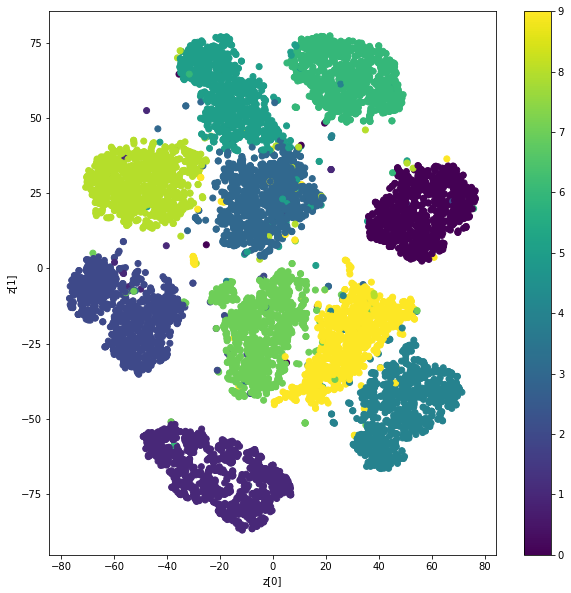

In [120]:
figure = plt.figure(figsize=(10,10))
plt.scatter(latent_embeded[:,0], latent_embeded[:,1], c=cat[:])
plt.colorbar()
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

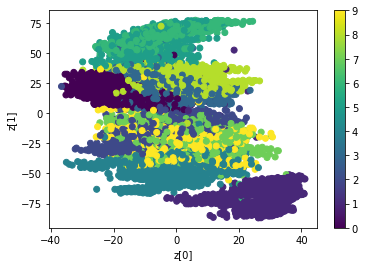

In [94]:
plt.scatter(latent_pca[:,0], latent_embeded[:,1], c=cat)
plt.colorbar()
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

In [96]:
Z[0].shape

torch.Size([64, 200])

In [98]:
x_hat = gmvae.decoder(Z[0])

In [99]:
x_hat.shape

torch.Size([64, 1, 28, 28])

In [127]:
z_rand = torch.randn(Z[0].shape)

In [129]:
z_rand.shape

torch.Size([64, 200])

In [128]:
x_rand = gmvae.decoder(z_rand)

/home/marouane/anaconda3/envs/test_sr/lib/python3.6/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [101]:
x_hat = x_hat.detach().numpy()

In [104]:
x_hat.shape

(64, 1, 28, 28)

In [130]:
x_rand = x_rand.detach().numpy()

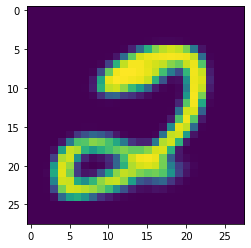

In [105]:
plt.imshow(x_hat[1].reshape(28,28))

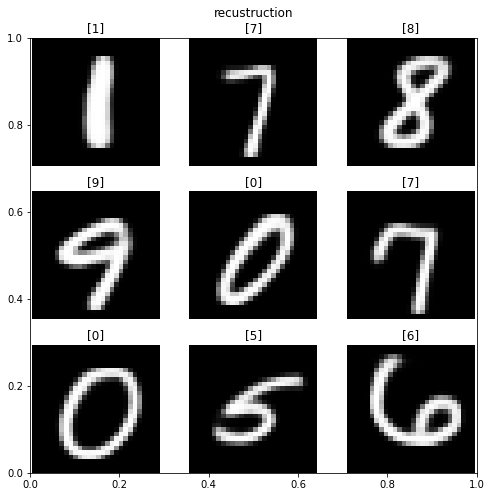

In [118]:
label_map = {
    0 : "plane",
    1 : "car",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}
figure = plt.figure(figsize=(8,8))
plt.title("recustruction\n")
row, col = 3, 3 
for i in range(1, row * col +1):
    sample_index = np.random.randint(len(x_hat), size=(1,))
    img = x_hat[sample_index].reshape(28,28)
    # img = img[2]
    figure.add_subplot(row, col, i)
    plt.title(cat[sample_index])
    plt.axis("off")
    plt.imshow(img, cmap="gray")

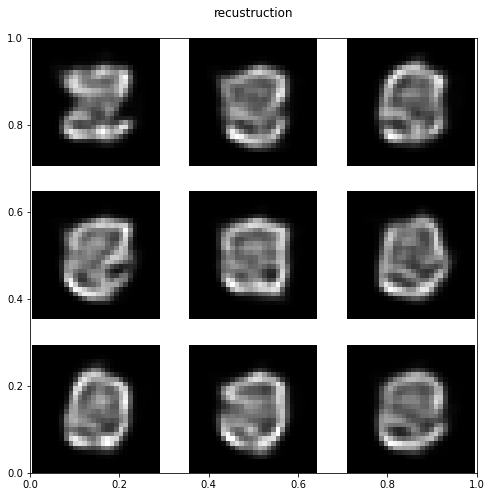

In [131]:
label_map = {
    0 : "plane",
    1 : "car",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}
figure = plt.figure(figsize=(8,8))
plt.title("recustruction\n")
row, col = 3, 3 
for i in range(1, row * col +1):
    sample_index = np.random.randint(len(x_rand), size=(1,))
    img = x_rand[sample_index].reshape(28,28)
    # img = img[2]
    figure.add_subplot(row, col, i)
    # plt.title(cat[sample_index])
    plt.axis("off")
    plt.imshow(img, cmap="gray")